# <span style="color:blue">Classes and Objects
AWS CLOUD INSTITUTE: PROVIDED FOR EDUCATIONAL INSTRUCTIONAL PURPOSES ONLY.

# Basic class structure

Attached below is the basic class diagram for this example. We start by focusing on the key components of a class:
- **Attributes**, **also known as properties or variables**, can **describe characteristics of an object** . 
- **Methods** are **blocks of code** that **perform a specific task**, like adjusting speed or changing color. A method is **a function** that is **attached to an object**.

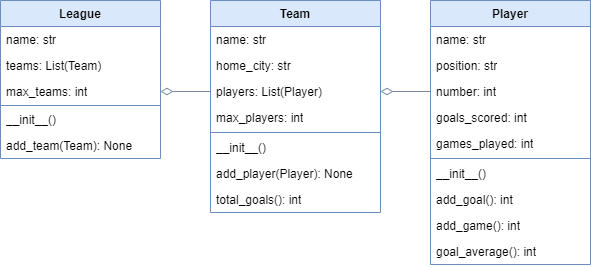

## Basic Player class
We **start** with a **simple** player class, but we'll **enhance it as we go along**. 

In [ ]:
class Player:
    """
    A class used to represent a player
    """

    def __init__(self, name, position = None, number = None, goals_scored = 0, games_played = 0):
        """
        Parameters:
            name(str): player name
            position(str): player position
            number(int): player number
            goals_scored(int): number of goals scored by the player
            games_played(int): number of games played by the player
        """
        # initialize object data
        self.name = name
        self.position = position
        self.number = number
        self.goals_scored = goals_scored
        self.games_played = games_played

    def add_goal(self):
        '''
        Adds a goal to the player's goals_scored
        '''
        self.goals_scored += 1

    def add_game(self):
        '''
        Adds a game to the player's games_played
        '''
        self.games_played += 1

    def goal_average(self):
        '''
        Calculates the average number of goals per game

        Returns:
            float: average number of goals per game
        '''
        if self.games_played == 0:
            return 0
        else:
            return self.goals_scored / self.games_played

### Instantiating players
**Instantiating** Player **objects** will **invoke** the **\_\_init()\_\_ method**.

In [ ]:
p1 = Player("Ronaldo", "striker", 9)
p2 = Player("Ronaldinho", "midfielder", 10)
p3 = Player("Messi", "striker", 10)
p4 = Player("Fillol", "goalkeeper", 1)
p5 = Player("Tab Ramos", "midfielder", 10)
p6 = Player("Alexis Lala", "defender", 22)

### Invoking methods
Now we can **execute** some **methods**, which will **modify** the **attributes** in them.

In [ ]:
p1.add_goal()
p1.add_game()
p5.add_goal()
p5.add_game()

### Retriving data
We can **access attributes** directly **from** the **object variable**.

In [ ]:
print(f"Player: {p1.name} - Goals scored: {p1.goals_scored}")
print(p2.position)
print(f"Number: {p3.number} - Games played: {p3.games_played}")
print(p4.name, p4.number, p4.position)
print(f"{p5.name} average goals per game: {p5.goal_average():.2f}")

### Printing the whole object

In [ ]:
print(p6)

This is **not particularly helpful**. This is just printing the object type (Player) and memory location. Let's **improve that** ...

## Updated Player class

### Adding the \_\_str\_\_() method
In Python, you can **use** the **\_\_str\_\_() dunder method** to **specify** **how** you want your **object** to be **represented as a string**. This is very useful for debugging.

In [ ]:
class Player:
    '''
    A class used to represent a player
    '''

    def __init__(self, name, position = None, number = None, goals_scored = 0, games_played = 0):
        '''
        Parameters:
            name(str): player name
            position(str): player position
            number(int): player number
            goals_scored(int): number of goals scored by the player
            games_played(int): number of games played by the player
        '''
        # initialize object data
        self.name = name
        self.position = position
        self.number = number
        self.goals_scored = goals_scored
        self.games_played = games_played

    def add_goal(self):
        '''
        Adds a goal to the player's goals_scored
        '''
        self.goals_scored += 1

    def add_game(self):
        '''
        Adds a game to the player's games_played
        '''
        self.games_played += 1

    def goal_average(self):
        '''
        Calculates the average number of goals per game

        Returns:
            float: average number of goals per game
        '''
        if self.games_played == 0:
            return 0
        else:
            return self.goals_scored / self.games_played        

    def __str__(self):
        '''
        Returns string representation of the object.

        Returns:
            String representation for the object data
        '''
        return f"Player: {self.name} - Position: {self.position} - Number: {self.number} - Goals: {self.goals_scored} - Games: {self.games_played}"
        

### Printing the whole object

In [ ]:
# instantiate players
p1 = Player("Ronaldo", "striker", 9, 10, 4)
p2 = Player("Ronaldinho", "midfielder", 10, 2, 3)
p3 = Player("Messi", "striker", 10, 3, 1)
p4 = Player("Fillol", "goalkeeper", 1, 0, 3)
p5 = Player("Tab Ramos", "midfielder", 10, 7, 4)
p6 = Player("Alexis Lala", "defender", 22, 2, 5)

# print players
print(p1)
print(p2)
print(p3)
print(p4)
print(p5)
print(p6)

That **looks a lot nicer**

# Types of variables and methods

## Initial Team class

In [ ]:
import json
class Team:
    """
    A class used to represent a team
    """

    # class variables
    max_players = 22    # maximum players in a team
    
    def __init__(self, name, home_city, players = []):
        """
        Parameters:
            name(str): team name
            home_city(str): team home city
            players(list): list of player objects
        """
        # initialize object instance variables
        self.name = name
        self.home_city = home_city

        # validate team size
        if (len(players) > self.max_players):
            raise ValueError("Team size exceeds maximum allowed players")
        self.players = players

    def add_player(self, player):
        '''
        Adds a player to the team

        Parameters:
            player(Player): player object
        '''
        self.players.append(player)

    def total_goals(self):
        '''
        Calculates the total number of goals scored by the team

        Returns:
            int: total number of goals scored
        '''
        total = 0
        for player in self.players:
            total += player.goals_scored
        return total
        
    @classmethod
    def validate_team_size(cls, size):
        '''
        Validates the team size

        Parameters:
            size(int): number of players in the team

        Returns:
            bool: True if the team size is valid, False otherwise
        '''
        return size <= cls.max_players

    @classmethod
    def from_json(cls, json_str):
        '''
        Creates a team object from a JSON string

        Parameters:
            json_str(str): JSON string

        Returns:
            team object
        '''

        # load json string intro a python dictionary
        team_data = json.loads(json_str)

        # create and return an class object from the data in the dictionary
        return cls(team_data['name'], team_data['home_city'], team_data['players'])

    @staticmethod
    def validate_json(json_str):
        '''
        Validate that a JSON string has all the attributes needed to create a Team.

        Parameters:
            json_str(str): JSON string

        Returns:
            Boolean indicating whether JSON is valid
        '''
        # load json string intro a python dictionary
        team_data = json.loads(json_str)

        # return True if all required keys are present in the dictionary, False otherwise
        return ('name' in team_data and 
                'home_city' in team_data and 
                'players' in team_data)

    def __str__(self):
        '''
        Returns string representation of the object.

        Returns:
            String representation for the object data
        '''
        return f"Team: {self.name} - Home city: {self.home_city} - Number of players: {len(self.players)}"

In [ ]:
team_brazil = Team("Brazil", "Brazilia", [p1, p2])
team_argentina = Team("Argentina", "Buenos Aires", [p3, p4])
team_usa = Team("USA", "Washington", [p5])  # <--- Only added one player here
print(team_brazil)
print(team_argentina)
print(team_usa)

### Instance variables and instance methods

#### Instance variables

**Instance variables** are **unique to each instance** or object of the class. A **change in the instance variable** will **change** the value of the property in that **specific object only**. The basic examples we saw earlier, used instance varianles to set and retrieve object data. They are the most commonly used.

In [ ]:
# retrieve team name and location from instance variable
print(f"Team Brazil: {team_brazil.name}")
print(f"Team Brazil home city: {team_brazil.home_city}")

#### Instance methods

**Instance methods** can **interact with instance variables**. They **require an object**, and **can access instance data specific to an object**. **Instance methods use** the ***self*** variable **to refer to instance variables**.

In [ ]:
# invoke an instance methid to calculate goals based on object data
brazil_goals = team_brazil.total_goals()

# invoke another instance method to update team players
team_usa.add_player(p6)

Verify changes ...

In [ ]:
print(f"Team Brazil total goals scored: {brazil_goals}")
print(f"Updated Team USA: {team_usa}")

### Class variables and class methods

#### Class variables

Class variables are **shared across all objects**, and **can be retrieved without an object**. Note that we're **not creating** an **object of** the ***Team* class**. We are **retrieving** the variable **directly** using **"Team.<varianle>"**.

In [ ]:
print(f"Maximum players per team: {Team.max_players}")

If we try **accessing** an **instance variable without an object**, we get an **error**

In [ ]:
print(f"Team home city: {Team.home_city}")

You would **need an object** to get the home_city instance variable ...

In [ ]:
print(f"Team home city: {team_usa.home_city}")
print(f"Team home city: {team_brazil.home_city}")

#### Class methods

Class methods can **only access class variables**, and **can be called without an object**. We indicate a class method with the **@classmethod decorator**. **Class methods use** the ***cls*** variable **to refer to class variables**.

In [ ]:
# check possible team sizes
team_size = 23
if Team.validate_team_size(team_size):
    print(f"Team size of {team_size} is valid")
else:
    print(f"Team size of {team_size} is invalid")

team_size = 12
if Team.validate_team_size(team_size):
    print(f"Team size of {team_size} is valid")
else:
    print(f"Team size of {team_size} is invalid")

### Static methods

Static methods **cannot access any object or class data**. They are used for **utility functions** that logically belong on a class, and **can be called without an object**, as if they were a regular standalone function.

In this **example**, we use a **static method to validate that a JSON string** has all the attributes that you would need to create an object of this class.

This could be **useful if** I **stored** my **objects offline in JSON format** in a database or file. When I read back the data, I may want to confirm nothing was corrupted, and I can still get all the data I need from it. So **this** an **example** of a **complete JSON string for a team**.

In [ ]:
json_str = '''{
    "name": "Italy",
    "home_city": "Rome",
    "players": [
        {
            "name": "Paolo Rossi",
            "position": "striker",
            "number": 20,
            "goals_scored": 3,
            "games_played": 1
        },
        {
            "name": "Gentile",
            "position": "defender",
            "number": 2,
            "goals_scored": 0,
            "games_played": 3
        }
    ]
}'''

We can validate that the JSON string has all the required data, using the static method.

In [ ]:
# validate JSON string
if (Team.validate_json(json_str)):
    print("JSON string is valid to create a Team")
else:
    print("JSON string is NOT valid to create a Team")

# Data hiding, encapsulation and abstraction

## Updated Team class
We'll use an **updated version** of the **Team Class to discuss** the concepts of **Data Hiding and Encapsulation**.

### Data hiding

In this updated version, we **add** some **attributes** related to the team's performance (**win, los or draw**), **but we "hide" them** using the **convention** of **prefixing the attribute name with a "\_"**. These **private attributes** are **accessed using "*getter/setter*" methods**. **Prefixing** the attrinute with a "\_" **doesn't actually prevent direct access** to the data, but it's a **convention followed in Python**.

Other object-oriented languages like Java, C# and C++ have more explicit mechanisms to defined private data.

### Encapsulation

Encapsulation is about **combining data and methods in a single class**, and **controlling data access**. Some **examples in the code below** include:
- The ***getters and setters*** giving **access to the private data**
- The ***add_player*** method **updating the roster**
- The ***total_points*** method with **calculates points total based on wins, losses, draws**, which is **also an example of abstraction**, which we'll see next

In [ ]:
import json

class Team:
    """
    A class used to represent a team
    """

    # class variables
    max_players = 22    # maximum players in a team
    
    def __init__(self, name, home_city, players = []):
        """
        Parameters:
            name(str): team name
            home_city(str): team home city
            players(list): list of player objects
            wins(int): number of wins
            losses(int): number of losses
            draws(int): number of draws
        """
        # initialize object instance variables
        self.name = name
        self.home_city = home_city
        self._wins = 0
        self._losses = 0
        self._draws = 0

        # validate team size
        if (len(players) > self.max_players):
            raise ValueError("Team size exceeds maximum allowed players")
        self.players = players

    # getter/setter methods for private attributes
    def get_wins(self):
        return self._wins

    def set_wins(self, wins):
        self._wins = wins

    def get_losses(self):
        return self._losses

    def set_losses(self, losses):
        self._losses = losses

    def get_draws(self):
        return self._draws

    def set_draws(self, draws):
        self._draws = draws
        
    def add_player(self, player):
        '''
        Adds a player to the team

        Parameters:
            player(Player): player object
        '''
        self.players.append(player)

    def total_goals(self):
        '''
        Calculates the total number of goals scored by the team

        Returns:
            int: total number of goals scored
        '''
        total = 0
        for player in self.players:
            total += player.goals_scored
        return total

    def total_points(self):
        '''
        Calculates the total number of points scored by the team, based on standard soccer rules.
        A victory counts for 3 points, and a draw counts for 1.

        Returns:
            int: total number of points scored
        '''
        return (self._wins * 3) + self._draws
        
    @classmethod
    def validate_team_size(cls, size):
        '''
        Validates the team size

        Parameters:
            size(int): number of players in the team

        Returns:
            bool: True if the team size is valid, False otherwise
        '''
        return size <= cls.max_players

    @staticmethod
    def validate_json(json_str):
        '''
        Validate that a JSON string has all the attributes needed to create a Team.

        Parameters:
            json_str(str): JSON string

        Returns:
            Boolean indicating whether JSON is valid
        '''
        # load json string intro a python dictionary
        team_data = json.loads(json_str)

        # return True if all required keys are present in the dictionary, False otherwise
        return ('name' in team_data and 
                'home_city' in team_data and 
                'players' in team_data)

    def __str__(self):
        '''
        Returns string representation of the object.

        Returns:
            String representation for the object data
        '''
        return f"Team: {self.name} - Home city: {self.home_city} - Number of players: {len(self.players)} - Wins: {self._wins}, Losses: {self._losses}, Draws: {self._draws}"

#### Recreate teams based on new class

In [ ]:
# create teams
team_brazil = Team("Brazil", "Brazilia", [p1, p2])
team_argentina = Team("Argentina", "Buenos Aires", [p3, p4])
team_usa = Team("USA", "Washnigton", [p5, p6])

# print teams
print(team_brazil)
print(team_argentina)
print(team_usa)

#### Using getter/setter methods to set or retrieve data

In [ ]:
# Use setters to set data
team_brazil.set_wins(2)
team_brazil.set_draws(1)
team_usa.set_wins(1)
team_usa.set_losses(1)
team_argentina.set_wins(2)
team_argentina.set_losses(1)

# retrieve data with getters
print(f"Team Brazil wins: {team_brazil.get_wins()}")
print(f"Team Brazil draws: {team_brazil.get_draws()}")
print(f"Team USA wins: {team_usa.get_wins()}")
print(f"Team USA losses: {team_usa.get_losses()}")
print(f"Team Argentina wins: {team_argentina.get_wins()}")
print(f"Team Argentina losses: {team_argentina.get_losses()}")


## The League Class

We **complete** our **basic example** introducing the **League class**, which will **aggregate, teams into leagues**.

### Abstraction

Abstraction is about **hiding unnecessary details and computations internally**, and exposing only the methods and data that are needed. Some **examples in the code below** include:
- ***validate_team***, which **validates** a **team without exposing** the **details of** the **rules**
- ***record_match***, which **internally performs** all the stat **updates needed** **when** a **match result** is **recorded**
- ***generate_leaderboard***, which **generates** a **sorted list of the teams based on** the **internal calculation of points** in the Team class *total_points()* method

Some of the **algorithms below are complex**, and we **won't walk through them** in detail, **but that's the** whole **point**. **Users** of the League class **don't need to worry about** that **low level implementation**. That **"secret sauce" is not exposed**.

In [ ]:
class League:
    '''
    A class used to represent a league
    '''

    # class variables
    
    # Dictionary storing rules for the league. Right now, it just stores the maximum number of teams
    _league_rules = {
        "max_teams": 10
    } 
    
    def __init__(self, name, teams = []):
        '''
        Parameters:
            name(str): league name
            teams(list): list of team objects
        '''
        # initialize object instance variables
        self.name = name
        self.teams = teams

        # define and initialize private attributes

        # list of matches
        self._matches = []

        # Dictionary storing rules for the league. Right now, it just stores the maximum number of teams
        self._league_rules = {
            "max_teams": 10
        } 
    
    def add_team(self, team):
        '''
        Adds a team to the league

        Parameters:
            team(Team): team object
        '''
        self.teams.append(team)

    @classmethod
    def validate_team(cls, team):
        '''
        Validates the team based on rules. Right now the only validation is for a team size, but that can be expanaded in the future.

        Parameters:
            team(Team): team object

        Returns:
            bool: True if the team size is valid, False otherwise
        '''
        return len(team.teams) < cls._league_rules["max_teams"]

    def record_match(self, match):
        '''
        Records a match in the league. This will not only add a match to the league list, but also update the stats for the teams involved.

        Parameters:
            match(dict): dictionary containing match details, including team names and scores. The dictionary structure will look like:
                {
                    "team1_name": <name>
                    "team1_score": <score>
                    "team2_name": <name>
                    "team2_score": <score>
                }
        '''
        # retrieve teams from the league, using helper method
        team1 = self.get_team(match["team1_name"])
        team2 = self.get_team(match["team2_name"])

        # if either team was not found, raise an exception
        if not team1 or not team2:
            raise ValueError("One or both teams not found in the league")

        # update win,loss, draw stats for which team based on the score
        if match["team1_score"] > match["team2_score"]:
            team1.set_wins(team1.get_wins() + 1)
            team2.set_losses(team2.get_losses() + 1)
        elif match["team1_score"] < match["team2_score"]:
            team1.set_losses(team1.get_losses() + 1)
            team2.set_wins(team2.get_wins() + 1)
        else:
            team1.set_draws(team1.get_draws() + 1)
            team2.set_draws(team2.get_draws() + 1)

        # add match to league matches
        self._matches.append(match)

    def get_team(self, team_name):
        '''
        Retrieves a team from the league by name

        Parameters:
            team_name(str): team name

        Returns:
            team object if found, None otherwise
        '''
        for team in self.teams:
            if team.name == team_name:
                return team
        return None

    def get_matches(self):
        '''
        Retrieves all matches in the league

        Returns:
            list of matches
        '''
        return self._matches

    def generate_leaderboard(self):
        '''
        Generates a leaderboard for the league, sorted by total points in descending order

        Returns:
            list of teams sorted by total points in descending order
        '''
        return sorted(self.teams, key=lambda x: x.total_points(), reverse=True)
        
    def __str__(self):
        '''
        Returns string representation of the object.

        Returns:
            String representation for the object data
        '''
        return f"League: {self.name} - Teams: {len(self.teams)}"

### Create a league and add teams

In [ ]:
world_league = League("World Cup", [team_brazil, team_argentina, team_usa])
print(world_league)

### Print current leaderboard

Use the *generate_leaderboard()* to **view the current leaderboard**, based on the initial win/loss/draw data we randomly entered.

In [ ]:
leader_board = world_league.generate_leaderboard()
for team in leader_board:
    print(f"{team.name}: {team.total_points()} points")

### Record some matches and review leaderboard

Now we **add the last three results** between the 3 teams (I actually looked that up), and our *record_match* method will **abstract all of the complexity** to update the stats of the teams involved.

In [ ]:
# Argentina 1 x 0 Brazil 
world_league.record_match({"team1_name": "Brazil", "team1_score": 0, "team2_name": "Argentina", "team2_score": 1})

# Argentina 4 x 0 USA
world_league.record_match({"team1_name": "Argentina", "team1_score": 4, "team2_name": "USA", "team2_score": 0})

# Brazil 1 x 1 USA
world_league.record_match({"team1_name": "USA", "team1_score": 1, "team2_name": "Brazil", "team2_score": 1})

In [ ]:
for team in world_league.generate_leaderboard():
    print(f"{team.name}: {team.total_points()} points")

### Updated class diagram

After the updates, this represents our current class design. Before we change some more ...

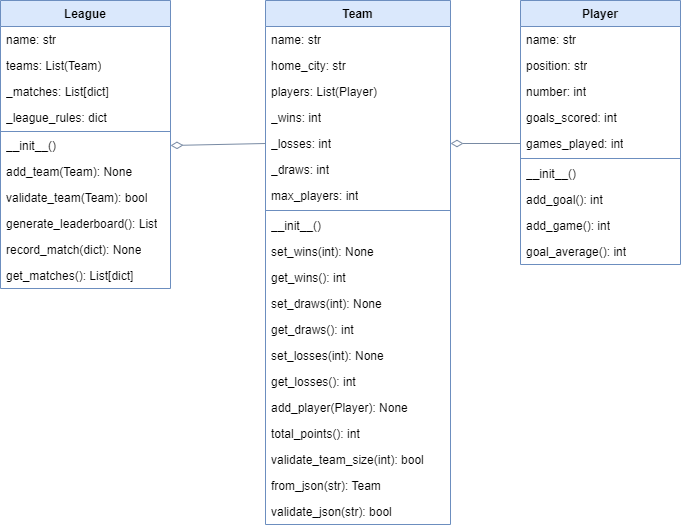

# <span style="color:blue"> OPTIONAL</span> - Extra examples

## Factory Class Method

### Team Class with *from_json* method

Another **use for class methods** is to **implement a "factory pattern"**, where you can **create objects of a class in different ways** besides the standard \_\_init\_\_. **For instance**, we may want to **create** an object **based on a JSON string** (which could have been stored offline).

In [ ]:
import json

class Team:
    """
    A class used to represent a team
    """

    # class variables
    max_players = 22    # maximum players in a team

    def __init__(self, name, home_city, players = []):
        """
        Parameters:
            name(str): team name
            home_city(str): team home city
            players(list): list of player objects
        """
        # initialize object instance variables
        self.name = name
        self.home_city = home_city

        # validate team size
        if (len(players) > self.max_players):
            raise ValueError("Team size exceeds maximum allowed players")
        self.players = players

    def add_player(self, player):
        '''
        Adds a player to the team

        Parameters:
            player(Player): player object
        '''
        self.players.append(player)

    def total_goals(self):
        '''
        Calculates the total number of goals scored by the team

        Returns:
            int: total number of goals scored
        '''
        total = 0
        for player in self.players:
            total += player.goals_scored
        return total
        
    @classmethod
    def validate_team_size(cls, size):
        '''
        Validates the team size

        Parameters:
            size(int): number of players in the team

        Returns:
            bool: True if the team size is valid, False otherwise
        '''
        return size <= cls.max_players

    @classmethod
    def from_json(cls, json_str):
        '''
        Creates a team object from a JSON string

        Parameters:
            json_str(str): JSON string

        Returns:
            team object
        '''

        # load json string intro a python dictionary
        team_data = json.loads(json_str)

        # create and return an class object from the data in the dictionary
        return cls(team_data['name'], team_data['home_city'], team_data['players'])

    @staticmethod
    def validate_json(json_str):
        '''
        Validate that a JSON string has all the attributes needed to create a Team.

        Parameters:
            json_str(str): JSON string

        Returns:
            Boolean indicating whether JSON is valid
        '''
        # load json string intro a python dictionary
        team_data = json.loads(json_str)

        # return True if all required keys are present in the dictionary, False otherwise
        return ('name' in team_data and 
                'home_city' in team_data and 
                'players' in team_data)

    def __str__(self):
        '''
        Returns string representation of the object.

        Returns:
            String representation for the object data
        '''
        return f"Team: {self.name} - Home city: {self.home_city} - Number of players: {len(self.players)}"

Define a JSON string for Team Italy ...

In [ ]:
json_str = '''{
    "name": "Italy",
    "home_city": "Rome",
    "players": [
        {
            "name": "Paolo Rossi",
            "position": "striker",
            "number": 20,
            "goals_scored": 3,
            "games_played": 1
        },
        {
            "name": "Gentile",
            "position": "defender",
            "number": 2,
            "goals_scored": 0,
            "games_played": 3
        }
    ]
}'''

Use the class method to create an object from it

In [ ]:
# Create an object from the JSON string, calling a class method
team_italy = Team.from_json(json_str)

# print team
print(team_italy)